# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir(r"D:\netmax\Text Analysis")

df = pd.read_excel("Input.xlsx",engine='openpyxl')
output_df = pd.read_excel("Output Data Structure.xlsx")

In [4]:
df.head()

,URL_ID,URL
0,37,https://insights.blackcoffer.com/ai-in-healthc...
1,38,https://insights.blackcoffer.com/what-if-the-c...
2,39,https://insights.blackcoffer.com/what-jobs-wil...
3,40,https://insights.blackcoffer.com/will-machine-...
4,41,https://insights.blackcoffer.com/will-ai-repla...


In [5]:
output_df.columns

Index(['URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE',
       'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH',
       'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX',
       'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT',
       'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH'],
      dtype='object')

In [6]:
output_df.head()

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,37,https://insights.blackcoffer.com/ai-in-healthc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38,https://insights.blackcoffer.com/what-if-the-c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39,https://insights.blackcoffer.com/what-jobs-wil...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,https://insights.blackcoffer.com/will-machine-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41,https://insights.blackcoffer.com/will-ai-repla...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Extracting Title and Text

In [7]:
import requests
from bs4 import BeautifulSoup


title=[]
text=[]

for i in df['URL']:
    # user-agent
    headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    # loading text in url
    r = requests.get(url=i,headers=headers)
    # creating a beautifulsoup object
    soup = BeautifulSoup(r.content,"html.parser")
    # find title(h1 is used to mark up the webpage title)
    try:
        titles=soup.find('h1').get_text()
        title.append(titles)
    except:
        title.append("Title not found")
    # find text(p tag used for paragraph)
    content=soup.find(attrs= {"class":"td-post-content"}).text if soup.find(attrs={"class": "td-post-content"}) else "Content not found"
    content=content.replace('\n'," ")
    text.append(content)
  

In [8]:
text

['  Introduction “If anything kills over 10 million people in the next few decades, it will be a highly infectious virus rather than a war. Not missiles but microbes.” Bill Gates’s remarks at a TED conference in 2014, right after the world had avoided the Ebola outbreak. When the new, unprecedented, invisible virus hit us, it met an overwhelmed and unprepared healthcare system and oblivious population. This public health emergency demonstrated our lack of scientific consideration and underlined the alarming need for robust innovations in our health and medical facilities. For the past few years, artificial intelligence has proven to be of tangible potential in the healthcare sectors, clinical practices, translational medical and biomedical research. After the first case was detected in China on December 31st 2019, it was an AI program developed by BlueDot that alerted the world about the pandemic. It was quick to realise AI’s ability to analyse large chunks of data could help in detect

In [9]:
title

['AI in healthcare to Improve Patient Outcomes',
 'What if the Creation is Taking Over the Creator?',
 'What Jobs Will Robots Take From Humans in The Future?',
 'Will Machine Replace The Human in the Future of Work?',
 'Will AI Replace Us or Work With Us?',
 'Will machine replace the human in the future of work?',
 'How humans and machines are evolving to work together?',
 'Title not found',
 'How machine learning will affect your business?',
 'Deep learning impact on areas of e-learning?',
 'How to protect future data and its privacy?',
 'How Machines, AI, Automations, and Robo-human are Effective in Finance and Banking?',
 'How Robo Human will Impact the Future?',
 'How AI will change the World?',
 'Future of Work: How AI Has Entered the Workplace',
 'How machine learning used in finance and banking?',
 'How AI will impact the future of work?',
 'All you need to know about online marketing',
 'Evolution of Advertising Industry',
 'How Data Analytics can help your business respond to 

In [10]:
text_df = pd.DataFrame({"title": title,
                        "text": text})

In [11]:
text_df

,title,text
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...
1,What if the Creation is Taking Over the Creator?,"Human minds, a fascination in itself carrying..."
2,What Jobs Will Robots Take From Humans in The ...,Introduction AI is rapidly evolving in the em...
3,Will Machine Replace The Human in the Future o...,“Anything that could give rise to smarter-tha...
4,Will AI Replace Us or Work With Us?,“Machine intelligence is the last invention t...
...,...,...
109,Blockchain for Payments,Reconciling with the financial realities of a...
110,The future of Investing,What Is an Investment? An investment is a res...
111,Big Data Analytics in Healthcare,Quality and affordable healthcare is a vision...
112,Business Analytics In The Healthcare Industry,Analytics is a statistical scientific process...


# Data Preprocessing

In [12]:
import nltk
import re             # regular expression
import os
from nltk.tokenize import word_tokenize # for tokenize
from nltk.corpus import stopwords

# Removing Stopwords


def load_stopwords_from_folder(folder_path, encodings=['utf-8', 'latin-1']):
    stopwords_list = set()

    for filename in os.listdir(folder_path):
        with open(os.path.join(folder_path, filename), 'rb') as file:
            for encoding in encodings:
                try:
                    content = file.read().decode(encoding)
                    stopwords_list.update(content.splitlines())
                    break  # Stop trying encodings if successful
                except UnicodeDecodeError:
                    continue  # Try the next encoding

    return stopwords_list

# Example usage:
stopwords_folder = r'D:\netmax\Text Analysis\StopWords'
stopwords_list = load_stopwords_from_folder(stopwords_folder)

print(stopwords_list)


# stemming
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()



{'CANTOR', 'ROUSSEL', 'TANESHA', 'ELKINS', 'HARPER', 'IRINA', 'CHRIST', 'MCEVOY', 'RHONDA', 'MALAVE', "you'd", 'COSTON', 'LATRICE', 'CONRAD', 'BROOKSHIRE', 'FIELDER', 'ROBINETTE', 'WHITEMAN', 'HOLCOMBE', 'BEATTY', 'SHOCKEY', 'LAVELLE', 'ALIA', 'FENNER', 'HENDRICKSON', 'EUFEMIA', 'BENTON', 'RICK', 'POLLEY', 'ORTIZ', 'LIZ', 'HELLEN', 'KARAN', 'DUNCAN', 'HARTMANN', 'VIRGIL', 'KOBAYASHI', 'f', 'HARDIN', 'APPLETON', 'SHANER', 'JAZMIN', 'CARMINA', 'SHUMAKER', 'MCGOWAN', 'FENTON', 'MINNA', 'CLORINDA', 'PETERSEN', 'MCCANTS', 'FREE', 'ARIANE', 'CLEMMONS', 'WALES', 'KOVACH', 'ROSALEE', 'BROWNE', 'BOSWELL', 'BRITO', 'RODRICK', 'MARQUIS', 'PAT', 'GILDA', 'HOSKINS', 'STALEY', 'RAINWATER', 'none', 'JOHNSTONE', 'AYAKO', 'PFEIFFER', 'STILES', 'LENOIR', 'GLYNN', 'LEAR', 'LUCINDA', 'DEBBI', 'LYNWOOD', 'PREWITT', 'HILDEBRANDT', 'CARRANZA', 'STEFAN', 'KELLERMAN', 'SHERMAN', 'MCLAUGHLIN', 'GAITHER', 'CARRASCO', 'MARNA', 'OZELLA', 'DOYLE', 'SWEAT', 'RASH', 'HUEY', 'KERLEY', 'BARKER', 'MOYERS', 'LUCY', 'FRAN

In [13]:
corpus=[]
for i in range(len(text_df['text'])):
    content = text_df.iloc[i,1]
    # see irrelevant words
    content = re.sub("[^a-zA-Z]"," ",content)        # replace no alphabetical words 
    content = content.lower()                            # lower form
    content = content.split()
    # task = remove word from list which is stopword and stemming
    content = [porter.stem(x)  for x in content  if x not in stopwords_list]
    corpus.append(content)

In [14]:
print(corpus)

[['introduct', 'kill', 'million', 'peopl', 'decad', 'highli', 'infecti', 'viru', 'war', 'missil', 'microb', 'bill', 'gate', 'remark', 'ted', 'confer', 'world', 'avoid', 'ebola', 'outbreak', 'unpreced', 'invis', 'viru', 'hit', 'met', 'overwhelm', 'unprepar', 'healthcar', 'system', 'oblivi', 'popul', 'public', 'health', 'emerg', 'demonstr', 'lack', 'scientif', 'consider', 'underlin', 'alarm', 'robust', 'innov', 'health', 'medic', 'facil', 'past', 'year', 'artifici', 'intellig', 'proven', 'tangibl', 'potenti', 'healthcar', 'sector', 'clinic', 'practic', 'translat', 'medic', 'biomed', 'research', 'case', 'detect', 'china', 'decemb', 'st', 'ai', 'program', 'develop', 'bluedot', 'alert', 'world', 'pandem', 'quick', 'realis', 'ai', 'abil', 'analys', 'larg', 'chunk', 'data', 'detect', 'pattern', 'identifi', 'track', 'carrier', 'viru', 'trace', 'app', 'ai', 'tab', 'peopl', 'infect', 'prevent', 'risk', 'cross', 'infect', 'ai', 'algorithm', 'track', 'pattern', 'extract', 'featur', 'classifi', 'ca

# Length of words

In [15]:
element_count = [len(sublist) for sublist in corpus]
print(element_count)

[1041, 613, 875, 711, 812, 587, 351, 2, 340, 1011, 1018, 616, 618, 701, 804, 274, 740, 478, 373, 150, 2, 678, 345, 832, 324, 198, 564, 355, 158, 89, 347, 80, 626, 251, 469, 859, 732, 680, 344, 523, 176, 812, 406, 471, 618, 713, 434, 698, 385, 632, 826, 1885, 812, 820, 70, 429, 729, 850, 518, 942, 464, 515, 486, 702, 76, 519, 307, 579, 421, 231, 283, 527, 253, 556, 485, 541, 611, 739, 927, 362, 992, 515, 178, 1191, 583, 827, 855, 1009, 867, 400, 805, 443, 365, 967, 923, 672, 552, 204, 129, 168, 100, 109, 335, 502, 438, 881, 303, 2, 431, 485, 810, 603, 374, 516]


# Check for positive words

In [16]:
import os
os.chdir(r"D:\netmax\Text Analysis\MasterDictionary")

# Download the positive words dictionary and store in local system
with open("positive-words.txt") as pos:
    pos_words = pos.read().split("\n")

pos_word=[]
for sublist in corpus:
    filtered_text = [word for word in sublist if word in pos_words]
    pos_word.append(filtered_text)


In [17]:
pos_count = [len(sublist) for sublist in pos_word]
print(pos_count)

[46, 56, 29, 34, 33, 29, 23, 0, 24, 40, 29, 11, 24, 42, 33, 11, 39, 21, 14, 5, 0, 18, 4, 13, 20, 3, 19, 14, 19, 1, 15, 6, 41, 6, 16, 19, 23, 20, 16, 38, 22, 13, 16, 47, 23, 21, 16, 25, 21, 26, 31, 41, 29, 13, 2, 21, 27, 27, 29, 22, 9, 18, 16, 17, 3, 19, 8, 17, 20, 5, 7, 20, 20, 4, 15, 26, 17, 36, 17, 26, 23, 22, 7, 37, 26, 22, 25, 30, 33, 17, 40, 24, 7, 19, 64, 21, 11, 0, 6, 1, 2, 1, 13, 15, 5, 17, 6, 0, 9, 11, 23, 28, 22, 30]


# Check for negative words

In [18]:
# Download the positive words dictionary and store in local system
with open("negative-words.txt") as neg:
    neg_words = neg.read().split("\n")

neg_word=[]
for sublist in corpus:
    filtered_text = [word for word in sublist if word in neg_words]
    neg_word.append(filtered_text)


In [19]:
neg_count = [len(sublist) for sublist in neg_word]
print(neg_count)

[24, 24, 30, 19, 21, 17, 5, 0, 7, 30, 57, 17, 22, 22, 15, 0, 25, 0, 3, 3, 0, 31, 9, 39, 3, 3, 9, 5, 7, 0, 23, 2, 15, 19, 28, 31, 13, 23, 5, 5, 5, 7, 44, 8, 28, 13, 52, 28, 10, 15, 38, 18, 36, 47, 1, 5, 25, 14, 28, 32, 26, 15, 15, 32, 1, 32, 16, 39, 25, 3, 1, 41, 16, 26, 27, 36, 23, 32, 27, 20, 60, 34, 6, 66, 44, 44, 58, 57, 17, 19, 47, 18, 25, 56, 18, 13, 22, 9, 2, 8, 5, 8, 11, 37, 32, 44, 17, 0, 11, 23, 17, 35, 4, 27]


# Dataframe

In [20]:
text_df['Positive_score'] = pos_count
text_df['Negative_score'] = neg_count
text_df['Word_count'] = element_count
text_df['URL'] = df['URL']
text_df['URL_ID'] = df['URL_ID']


In [21]:
text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37
1,What if the Creation is Taking Over the Creator?,"Human minds, a fascination in itself carrying...",56,24,613,https://insights.blackcoffer.com/what-if-the-c...,38
2,What Jobs Will Robots Take From Humans in The ...,Introduction AI is rapidly evolving in the em...,29,30,875,https://insights.blackcoffer.com/what-jobs-wil...,39
3,Will Machine Replace The Human in the Future o...,“Anything that could give rise to smarter-tha...,34,19,711,https://insights.blackcoffer.com/will-machine-...,40
4,Will AI Replace Us or Work With Us?,“Machine intelligence is the last invention t...,33,21,812,https://insights.blackcoffer.com/will-ai-repla...,41


# calculate Polarity Score & Subjectivity Score


In [22]:
from textblob import TextBlob
# Function to calculate polarity and subjectivity scores
def get_sentiment_scores(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the function to the dataframe
text_df['polarity'], text_df['subjectivity'] = zip(*text_df['text'].apply(get_sentiment_scores))
text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364
1,What if the Creation is Taking Over the Creator?,"Human minds, a fascination in itself carrying...",56,24,613,https://insights.blackcoffer.com/what-if-the-c...,38,0.074693,0.433596
2,What Jobs Will Robots Take From Humans in The ...,Introduction AI is rapidly evolving in the em...,29,30,875,https://insights.blackcoffer.com/what-jobs-wil...,39,0.111470,0.483201
3,Will Machine Replace The Human in the Future o...,“Anything that could give rise to smarter-tha...,34,19,711,https://insights.blackcoffer.com/will-machine-...,40,0.142050,0.487387
4,Will AI Replace Us or Work With Us?,“Machine intelligence is the last invention t...,33,21,812,https://insights.blackcoffer.com/will-ai-repla...,41,0.053178,0.509139


# AVG SENTENCE LENGTH

In [23]:

# Function to calculate sentence length
def get_sentence_length(text):
    return [len(sent.split()) for sent in text]

# Tokenize the sentences and calculate the length
text_df['sentence_lengths'] = text_df['text'].apply(get_sentence_length)

# Compute the average sentence length
text_df['avg_sentence_length'] = text_df['sentence_lengths'].apply(lambda x: sum(x) / len(x))*100

text_df.drop("sentence_lengths",axis=1,inplace=True)

In [51]:
text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity,avg_sentence_length,sentence_length
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364,140.297297,12182


# percentage of complex words

In [34]:
# Function to count complex words
def count_complex_words(sentence):
    vowels = ['a', 'e', 'i', 'o', 'u']
    count = 0
    complex_Word_Count = 0

    # Tokenize the sentence into words
    tokenize_text = sentence.split()

    for i in tokenize_text:
        x = re.compile('[es|ed]$')
        if x.match(i.lower()):
            count += 0
        else:
            for j in i:
                if (j.lower() in vowels):
                    count += 1
        if (count > 2):
            complex_Word_Count += 1
        count = 0

    return complex_Word_Count

# Apply the function to the 'text' column of the DataFrame
text_df['per_complex_word_count'] = (text_df['text'].apply(count_complex_words))/100
text_df['complex_word_count'] = text_df['text'].apply(count_complex_words)

text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity,avg_sentence_length,per_complex_word_count,fog_index,avg_num_words_per_sentence,personal_pronoun_count,syllable_count,avg_word_length,complex_word_count
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364,85.224101,6.31,36.613640,22.400000,0,2760,5.800000,631
1,What if the Creation is Taking Over the Creator?,"Human minds, a fascination in itself carrying...",56,24,613,https://insights.blackcoffer.com/what-if-the-c...,38,0.074693,0.433596,83.274399,3.38,34.661760,17.231707,6,1755,5.007087,338
2,What Jobs Will Robots Take From Humans in The ...,Introduction AI is rapidly evolving in the em...,29,30,875,https://insights.blackcoffer.com/what-jobs-wil...,39,0.111470,0.483201,84.662411,5.71,36.148964,20.000000,2,2576,5.539412,571
3,Will Machine Replace The Human in the Future o...,“Anything that could give rise to smarter-tha...,34,19,711,https://insights.blackcoffer.com/will-machine-...,40,0.142050,0.487387,82.015770,3.90,34.366308,17.197917,18,2302,4.916970,390
4,Will AI Replace Us or Work With Us?,“Machine intelligence is the last invention t...,33,21,812,https://insights.blackcoffer.com/will-ai-repla...,41,0.053178,0.509139,83.829201,4.55,35.351680,19.863636,13,2464,5.249569,455


# Fog index

In [25]:
text_df['fog_index'] = 0.4*(text_df['avg_sentence_length']+text_df['per_complex_word_count'])

In [26]:
text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity,avg_sentence_length,per_complex_word_count,fog_index
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364,85.224101,6.31,36.61364


# AVG NUMBER OF WORDS PER SENTENCES


In [27]:
# Function to calculate the average number of words per sentence
def avg_words_per_sentence(sentence):
    sentences = re.split(r'[?!.]', sentence)
    num_sentences = len([s for s in sentences if s.strip()])
    total_words = sum(len(s.split()) for s in sentences if s.strip())
    return total_words / num_sentences
# Apply the function to the 'text' column of the DataFrame
text_df['avg_num_words_per_sentence'] = text_df['text'].apply(avg_words_per_sentence)

text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity,avg_sentence_length,per_complex_word_count,fog_index,avg_num_words_per_sentence
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364,85.224101,6.31,36.61364,22.4


# Personal Pronoun

In [28]:
pronouns = ['i', 'we', 'my', 'ours', 'us']

# Function to count personal pronouns in a sentence
def count_personal_pronouns(sentence):
    count = sum(1 for word in sentence.split() if word.lower() in pronouns)
    return count

# Apply the function to the 'text' column of the DataFrame
text_df['personal_pronoun_count'] = text_df['text'].apply(count_personal_pronouns)
text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity,avg_sentence_length,per_complex_word_count,fog_index,avg_num_words_per_sentence,personal_pronoun_count
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364,85.224101,6.31,36.613640,22.400000,0
1,What if the Creation is Taking Over the Creator?,"Human minds, a fascination in itself carrying...",56,24,613,https://insights.blackcoffer.com/what-if-the-c...,38,0.074693,0.433596,83.274399,3.38,34.661760,17.231707,6
2,What Jobs Will Robots Take From Humans in The ...,Introduction AI is rapidly evolving in the em...,29,30,875,https://insights.blackcoffer.com/what-jobs-wil...,39,0.111470,0.483201,84.662411,5.71,36.148964,20.000000,2
3,Will Machine Replace The Human in the Future o...,“Anything that could give rise to smarter-tha...,34,19,711,https://insights.blackcoffer.com/will-machine-...,40,0.142050,0.487387,82.015770,3.90,34.366308,17.197917,18
4,Will AI Replace Us or Work With Us?,“Machine intelligence is the last invention t...,33,21,812,https://insights.blackcoffer.com/will-ai-repla...,41,0.053178,0.509139,83.829201,4.55,35.351680,19.863636,13


# SYLLABLE COUNT

In [29]:
corpus = pd.DataFrame(corpus)

In [30]:

# Load the CMU Pronouncing Dictionary from NLTK
nltk.download('cmudict')
from nltk.corpus import cmudict
pronouncing_dict = cmudict.dict()

# Function to count syllables in a word
def count_syllables(word):
    return max([len(list(y for y in x if y[-1].isdigit())) for x in pronouncing_dict.get(word.lower(), [[]])])

# Function to count syllables in a sentence without tokenization
def count_syllables_in_sentence(sentence):
    words = sentence.split()
    syllable_count = sum(count_syllables(word) for word in words)
    return syllable_count

# Apply the function to the 'text' column of the DataFrame
text_df['syllable_count'] = text_df['text'].apply(count_syllables_in_sentence)



[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


# AVG WORD LENGTH

In [31]:
def average_word_length(sentence):
    words = sentence.split()
    word_lengths = [len(word) for word in words]
    return sum(word_lengths) / len(word_lengths)

# Apply the function to the 'text' column of the DataFrame
text_df['avg_word_length'] = text_df['text'].apply(average_word_length)

text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity,avg_sentence_length,per_complex_word_count,fog_index,avg_num_words_per_sentence,personal_pronoun_count,syllable_count,avg_word_length
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364,85.224101,6.31,36.613640,22.400000,0,2760,5.800000
1,What if the Creation is Taking Over the Creator?,"Human minds, a fascination in itself carrying...",56,24,613,https://insights.blackcoffer.com/what-if-the-c...,38,0.074693,0.433596,83.274399,3.38,34.661760,17.231707,6,1755,5.007087
2,What Jobs Will Robots Take From Humans in The ...,Introduction AI is rapidly evolving in the em...,29,30,875,https://insights.blackcoffer.com/what-jobs-wil...,39,0.111470,0.483201,84.662411,5.71,36.148964,20.000000,2,2576,5.539412
3,Will Machine Replace The Human in the Future o...,“Anything that could give rise to smarter-tha...,34,19,711,https://insights.blackcoffer.com/will-machine-...,40,0.142050,0.487387,82.015770,3.90,34.366308,17.197917,18,2302,4.916970
4,Will AI Replace Us or Work With Us?,“Machine intelligence is the last invention t...,33,21,812,https://insights.blackcoffer.com/will-ai-repla...,41,0.053178,0.509139,83.829201,4.55,35.351680,19.863636,13,2464,5.249569


In [32]:
text_df.head(1)

,title,text,Positive_score,Negative_score,Word_count,URL,URL_ID,polarity,subjectivity,avg_sentence_length,per_complex_word_count,fog_index,avg_num_words_per_sentence,personal_pronoun_count,syllable_count,avg_word_length
0,AI in healthcare to Improve Patient Outcomes,Introduction “If anything kills over 10 mill...,46,24,1041,https://insights.blackcoffer.com/ai-in-healthc...,37,0.136936,0.463364,85.224101,6.31,36.61364,22.4,0,2760,5.8


In [35]:
output_df['POSITIVE SCORE'] = text_df['Positive_score']
output_df['NEGATIVE SCORE'] = text_df['Negative_score']
output_df['POLARITY SCORE'] = text_df['polarity']
output_df['SUBJECTIVITY SCORE'] = text_df['subjectivity']
output_df['FOG INDEX'] = text_df['fog_index']
output_df['AVG SENTENCE LENGTH'] = text_df['avg_sentence_length']
output_df['PERCENTAGE OF COMPLEX WORDS'] = text_df['per_complex_word_count']
output_df['AVG NUMBER OF WORDS PER SENTENCE'] = text_df['avg_num_words_per_sentence']
output_df['COMPLEX WORD COUNT'] = text_df['complex_word_count']
output_df['WORD COUNT'] = text_df['Word_count']
output_df['SYLLABLE PER WORD'] = text_df['syllable_count']
output_df['PERSONAL PRONOUNS'] = text_df['personal_pronoun_count']
output_df['AVG WORD LENGTH'] = text_df['avg_word_length']



# Word cloud

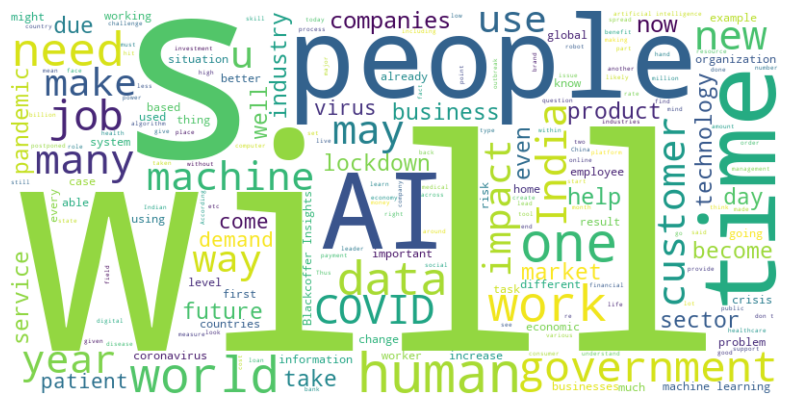

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have a DataFrame named 'output_df' with the 'text' column filled.

# Combine all sentences into a single text
all_text = ' '.join(text_df['text'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [44]:
os.chdir(r'D:\netmax\Text Analysis')

In [46]:
output_file_path = r'D:\netmax\Text Analysis\Output Data Structure.xlsx'
output_df.to_excel(output_file_path, index=False)  
